In [3]:
# importa, seta configuracao, le arquivo e tira colunas 'unnamed'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import radviz
from pandas.plotting import parallel_coordinates
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('dados_filtrados_v3.csv')
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

In [4]:
data = df.copy()
filteredCols = 'Forma de saída da opção'
colNames = [c for c in data.columns if c.lower()[:len(filteredCols)] != filteredCols.lower()]
data = data[colNames]

In [5]:
currentLabel = 'Menção na disciplina'
tam_kluster = len(data[currentLabel].unique())
X = data[data.columns.difference([currentLabel, 'Data de Nascimento'])]
y_columns = data[currentLabel]

In [6]:
kmeans = KMeans(n_clusters=tam_kluster, random_state=42).fit(X)
kmeans.cluster_centers_

array([[ 2.01318883e+04,  1.44287384e-01,  1.77160341e+01,
         1.70854015e+02,  4.21447946e+00,  3.13094582e+00,
         1.84531765e+05,  1.74968306e+05,  3.19026396e+00,
         2.01088739e+04,  1.16688336e+04,  2.16241427e+00,
         1.52071802e-01, -3.47784859e-01,  2.12120978e+01,
         4.62631486e+00],
       [ 1.99942963e+04,  1.38777878e-17,  1.81141324e+01,
         1.93710960e+02,  4.44547776e+00,  2.21516298e+00,
         1.19408663e+05,  5.55005372e+04,  3.20043238e+00,
         1.99737799e+04,  2.00234587e+04,  1.91550031e-01,
         1.17673370e-01, -3.70874257e-03,  2.17272117e+01,
         4.10727398e+00],
       [ 2.01198995e+04,  1.24392354e-01,  1.67947392e+01,
         1.68664023e+02,  4.28549065e+00,  2.36044739e+00,
         1.18366583e+05,  1.63385505e+05,  3.05346049e+00,
         2.01004444e+04,  1.51494431e+04,  2.17885392e+00,
         1.35371179e-01, -4.07946774e-01,  2.10988506e+01,
         3.90571187e+00],
       [ 2.01486706e+04,  2.31437279e

In [7]:
#PCA first

sklearn_pca = sklearnPCA(n_components=2)

Y_sklearn = sklearn_pca.fit_transform(X)

In [8]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

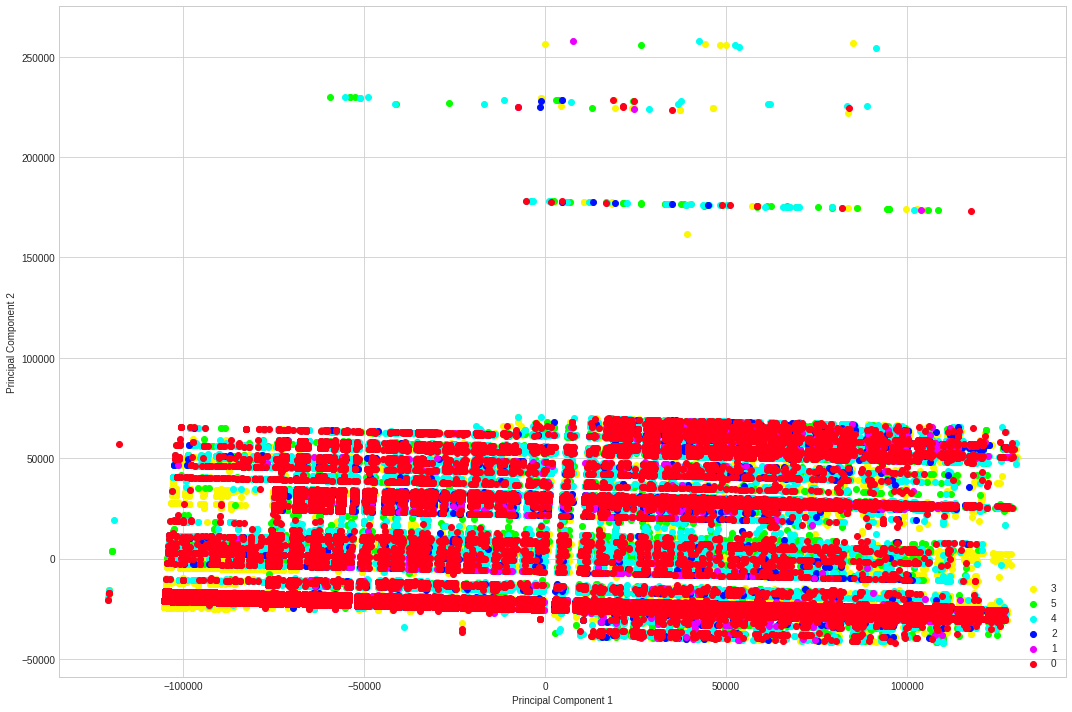

No handles with labels found to put in legend.


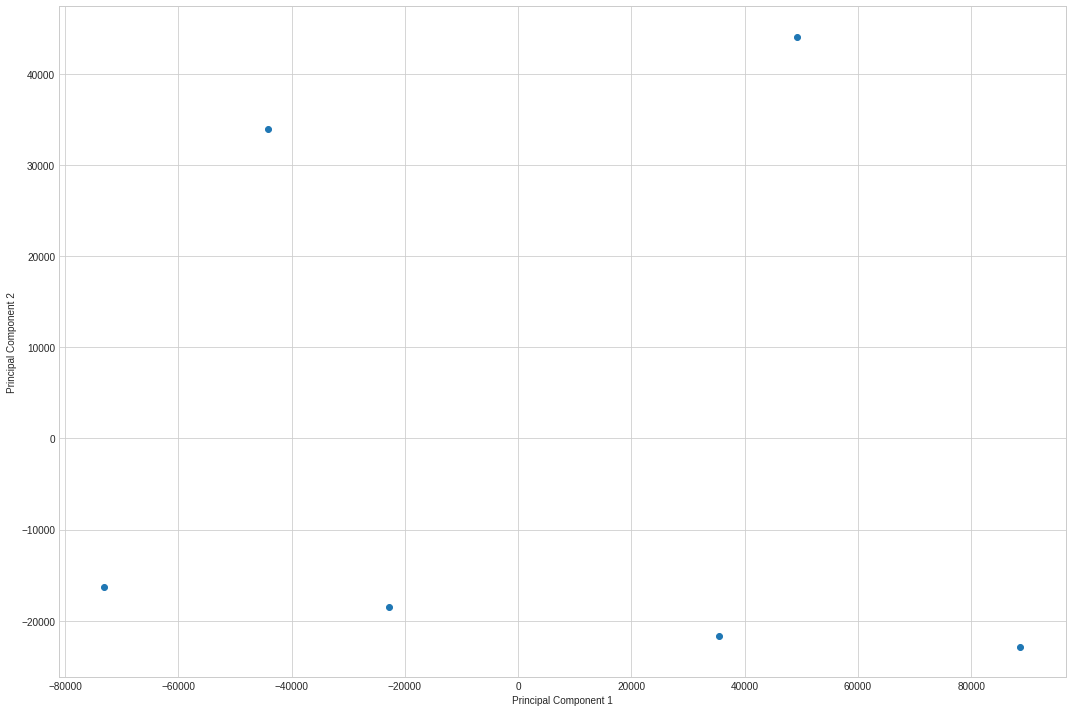

In [9]:
kmeansPCA = KMeans(n_clusters=tam_kluster, random_state=42).fit(Y_sklearn)
kmeansPCA.cluster_centers_


currentLabel = 'Menção na disciplina'
y = data[currentLabel].values
cmap = get_cmap(tam_kluster+1)
colorList = [cmap(i) for i in range(1, tam_kluster+1)]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))
    for lab, col in zip(data[currentLabel].unique(),
                        colorList):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plt.show()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))
    
    plt.scatter(kmeansPCA.cluster_centers_[:,0],
                    kmeansPCA.cluster_centers_[:,1],
                    )
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
plt.show()

In [10]:
kmeansPCA.cluster_centers_[:,0]

array([ 49166.5269727 , -73044.00291745,  88599.07325429, -44210.76046924,
        35546.13557589, -22735.92321438])